# DATA PREPARATION AND EDA

<blockquote>In the Project, I shall be using Logistic Regression in Predicting Campus Recruitment and also detect the Bias in the protected characteristics, Gender (Male and Female)</blockquote>

<blockquote>Machine Learning is a field of study that gives computers the abiliy to learn without being explicitly programmed. It is the study of computer algorithms that improve automatically through experience</blockquote>

<blockquote>Dataset is the Placement Data.csv dataset from Kaggle</blockquote>
<ol>
    <l1>Column names are:<l1>
    <li>sl_no: Serial No</li>
    <li>gender: "Male", "Female</li>
    <li>ssc_p: Secondary Education Percentage</li>
    <li>ssc_b: Board of Education "Central", "Others"</li>
    <li>hsc_p: Higher Secondary Education Percentage</li>
    <li>hsc_b: Board of Education "Central" "Others"</li>
    <li>hsc_s: Specialization in Higher Secondat Education "Commerce", "Science", "Others"</li>
    <li>degree_p: Degree Percentage</li>
    <li>degree_t: Degree Type "Commerce and Mgmt", "Science and Tech", "Others"</li>
    <li>workex: Work Experience  "Yes", "No"</li>
    <li>etest_p: Epmloyability Test Percentage</li>
    <li>specialization: Post Grad MBA "Mkt and Fin", "Mkt and HR"</li>
    <li>mba_p: MBA Percentage</li>
    <li>status: Status of Placement "Placed", "Not Placed"</li>
    <li>salary: Salary offered by corporate to successful candidates</li>

In [1]:
# Reduce warnings
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import Dataset

camp_emp = pd.read_csv(
    'C:/Users/C2245096/OneDrive - Teesside University/SEMESTER TWO/AI ETHICS AND APPLICATNS/ICA ELEMENT 2/Placement_Data_Full_Class.csv')
camp_emp.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [3]:
# Checking for the number of rows in the dataset
print('Number of rows:', len(camp_emp))

# Dimensionality of the dataset
print('Dimension:', camp_emp.shape)

Number of rows: 215
Dimension: (215, 15)


In [4]:
# Getting to know the data types of the dataset
camp_emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [5]:
# Basic Statistics of the dataset
camp_emp.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [6]:
# Drop Columns

camp_emp.drop(["salary", "sl_no"], axis=1, inplace=True)

In [7]:
camp_emp.drop(["ssc_b", "hsc_b"], axis=1, inplace=True)

In [8]:
camp_emp.head()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,M,67.00,91.00,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,78.33,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,68.00,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,52.00,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,73.60,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


In [9]:
# Identifying missing values

camp_emp.isnull().sum()

gender            0
ssc_p             0
hsc_p             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
dtype: int64

In [10]:
# Unique count in each column

count = {}
for i in list(camp_emp.columns):
    count[i] = camp_emp[i].value_counts().shape[0]
pd.DataFrame(count, index=["Unique Count"]).transpose()

,Unique Count
gender,2
ssc_p,103
hsc_p,97
hsc_s,3
degree_p,89
degree_t,3
workex,2
etest_p,100
specialisation,2
mba_p,205


# Splitting the columns into Categorical, Continuous and Output columns

In [11]:
cat_col = ['gender', 'hsc_s', 'degree_t', 'workex', 'specialisation']
cont_col = ['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']
output_col = ['status']

print('Categorical columns:', cat_col, sep='\n')
print('Continuous columns:', cont_col, sep='\n')
print('Output variable:', output_col, sep='\n')

Categorical columns:
['gender', 'hsc_s', 'degree_t', 'workex', 'specialisation']
Continuous columns:
['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']
Output variable:
['status']


In [12]:
# Summary of the continous column
camp_emp[cont_col].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ssc_p,215.0,67.303395,10.827205,40.89,60.600,67.0,75.700,89.40
hsc_p,215.0,66.333163,10.897509,37.00,60.900,65.0,73.000,97.70
degree_p,215.0,66.370186,7.358743,50.00,61.000,66.0,72.000,91.00
etest_p,215.0,72.100558,13.275956,50.00,60.000,71.0,83.500,98.00
mba_p,215.0,62.278186,5.833385,51.21,57.945,62.0,66.255,77.89


# Identifying Outliers within the continuous column

<blockquote>An outlier is an extremely high or extremely low data point relative to the nearest data point and the
    rest of the neighboring co-existing values in a data graph or dataset</blockquote>

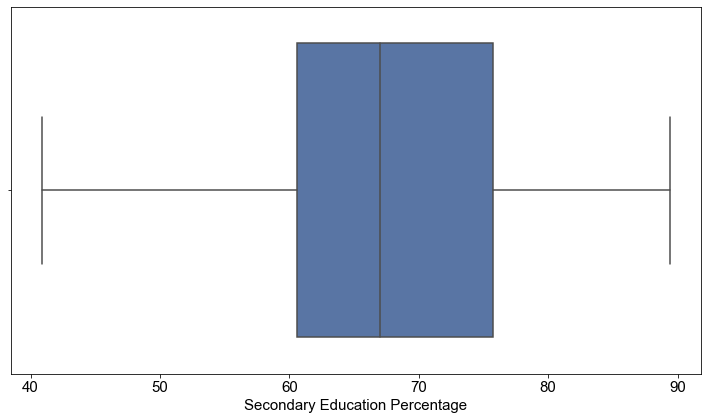

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(10, 6)
sns.set(style="whitegrid")
ax = sns.boxplot(x=camp_emp['ssc_p'])
ax.set_xlabel('Secondary Education Percentage', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
fig.tight_layout()
#fig.savefig('boxplot_ssc_p.png')

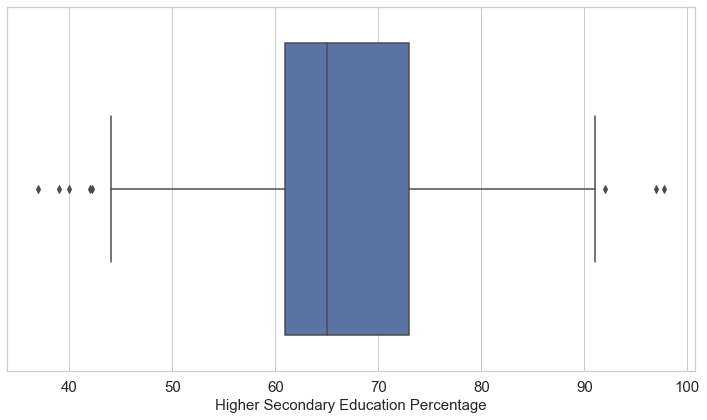

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(10, 6)
sns.set(style="whitegrid")
ax = sns.boxplot(x=camp_emp['hsc_p'])
ax.set_xlabel('Higher Secondary Education Percentage', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
fig.tight_layout()
#fig.savefig('boxplot_hsc_p.png')

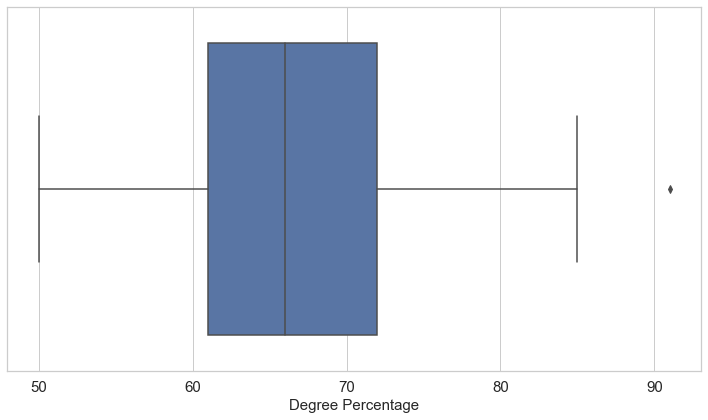

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(10, 6)
sns.set(style="whitegrid")
ax = sns.boxplot(x=camp_emp['degree_p'])
ax.set_xlabel('Degree Percentage', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
fig.tight_layout()
#fig.savefig('boxplot_degree_p.png')

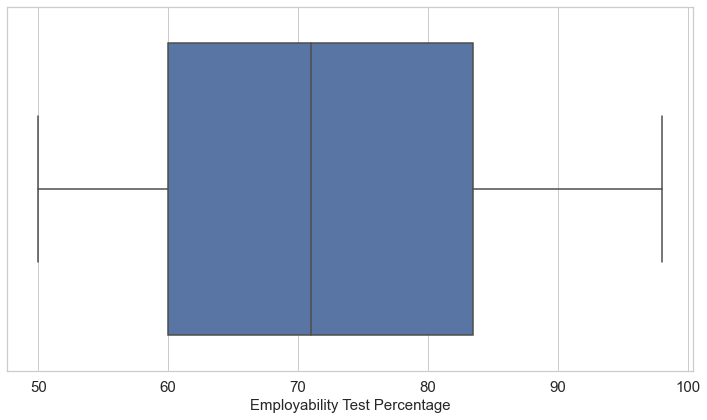

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(10, 6)
sns.set(style="whitegrid")
ax = sns.boxplot(x=camp_emp['etest_p'])
ax.set_xlabel('Employability Test Percentage', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
fig.tight_layout()
#fig.savefig('boxplot_etest_p.png')

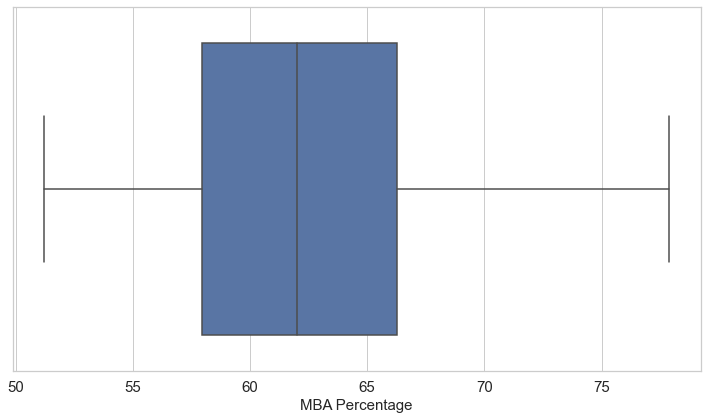

In [17]:
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(10, 6)
sns.set(style="whitegrid")
ax = sns.boxplot(x=camp_emp['mba_p'])
ax.set_xlabel('MBA Percentage', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
fig.tight_layout()
#fig.savefig('boxplot_mba_p.png')

# Removing Outliers using Mean Imputation

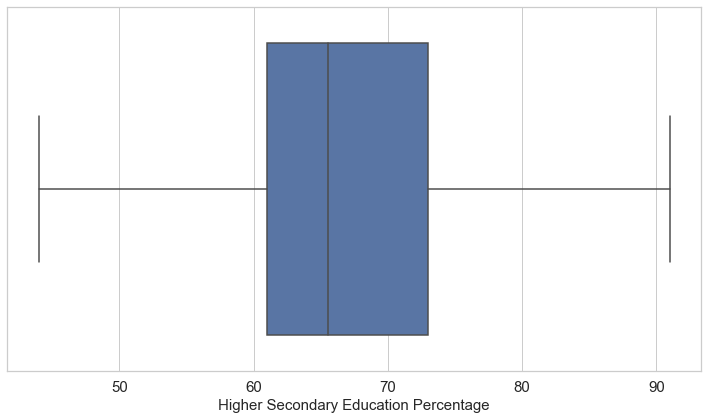

In [18]:
for i in camp_emp['hsc_p']:
    q1 = camp_emp['hsc_p'].quantile(0.25)
    q3 = camp_emp['hsc_p'].quantile(0.75)
    IQR = q3-q1
    lower_fence = q1-1.5*IQR
    upper_fence = q3+1.5*IQR
    
    if i > upper_fence or i < lower_fence:
        camp_emp['hsc_p'] = camp_emp['hsc_p'].replace(i, np.mean(camp_emp['hsc_p']))

# Plotting the result
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(10, 6)
ax = sns.boxplot(x=camp_emp['hsc_p'])
ax.set_xlabel('Higher Secondary Education Percentage', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
fig.tight_layout()
#fig.savefig('boxplot_cleaning_outlier_hsc_p.png')

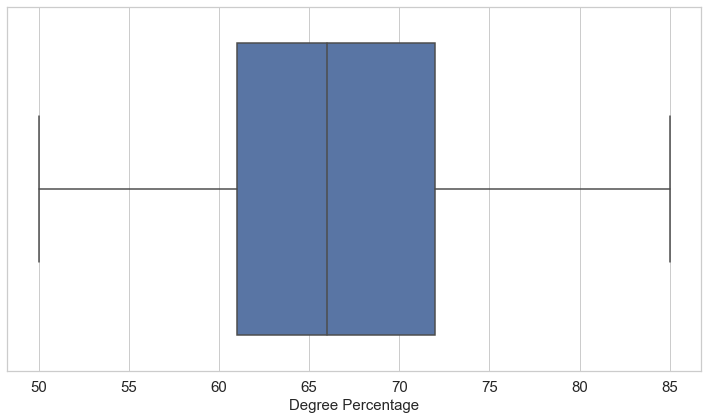

In [19]:
for i in camp_emp['degree_p']:
    q1 = camp_emp['degree_p'].quantile(0.25)
    q3 = camp_emp['degree_p'].quantile(0.75)
    IQR = q3-q1
    lower_fence = q1-1.5*IQR
    upper_fence = q3+1.5*IQR
    
    if i > upper_fence or i < lower_fence:
        camp_emp['degree_p'] = camp_emp['degree_p'].replace(i, np.mean(camp_emp['degree_p']))

# Plotting the result
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(10, 6)
ax = sns.boxplot(x=camp_emp['degree_p'])
ax.set_xlabel('Degree Percentage', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
fig.tight_layout()
#fig.savefig('boxplot_cleaning_outlier_degree_p.png')

# Plotting the Count of the Categorical Columns

In [20]:
# Summary of the categorical column
camp_emp[cat_col].describe()

,gender,hsc_s,degree_t,workex,specialisation
count,215,215,215,215,215
unique,2,3,3,2,2
top,M,Commerce,Comm&Mgmt,No,Mkt&Fin
freq,139,113,145,141,120


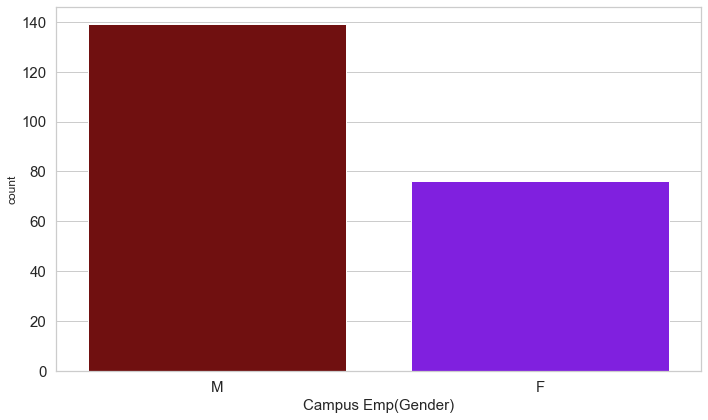

In [21]:
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(10, 6)
gs = fig.add_gridspec(3,3) 
ax = sns.countplot(x=camp_emp['gender'], palette=color_palette)
ax.set_xlabel('Campus Emp(Gender)', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
fig.tight_layout()
#fig.savefig('countplot_gender.png')

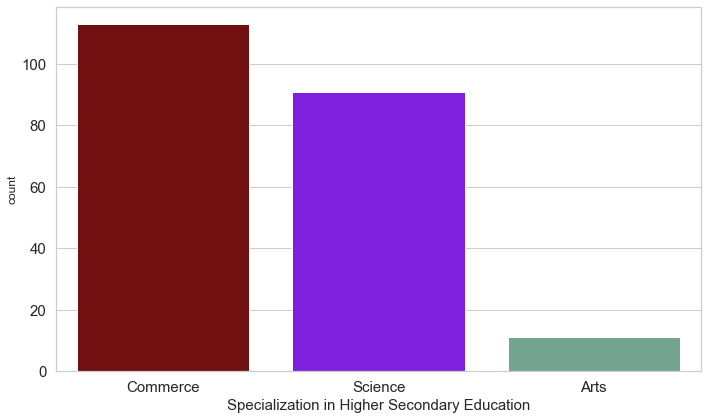

In [22]:
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(10, 6)
gs = fig.add_gridspec(3,3) 
ax = sns.countplot(x=camp_emp['hsc_s'], palette=color_palette)
ax.set_xlabel('Specialization in Higher Secondary Education', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
fig.tight_layout()
#fig.savefig('countplot_hsc_s.png')

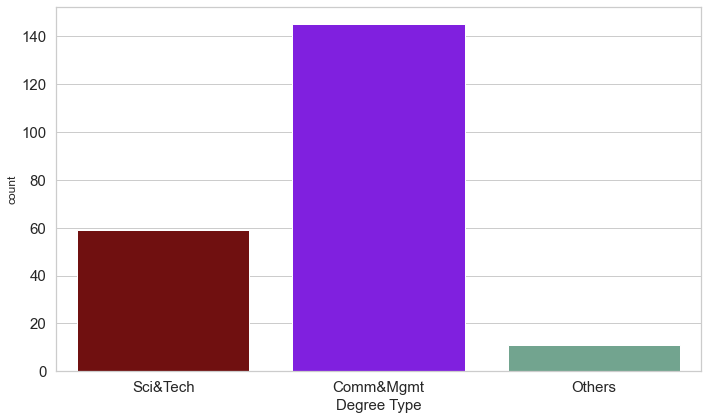

In [23]:
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(10, 6)
gs = fig.add_gridspec(3,3) 
ax = sns.countplot(x=camp_emp['degree_t'], palette=color_palette)
ax.set_xlabel('Degree Type', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
fig.tight_layout()
#fig.savefig('countplot_degree_t.png')

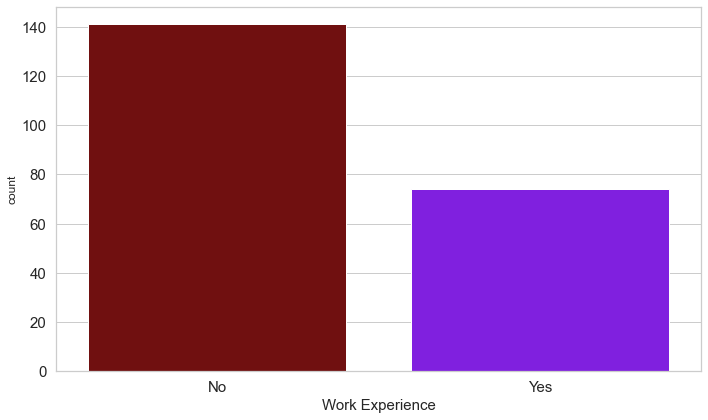

In [24]:
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(10, 6)
gs = fig.add_gridspec(3,3) 
ax = sns.countplot(x=camp_emp['workex'], palette=color_palette)
ax.set_xlabel('Work Experience', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
fig.tight_layout()
#fig.savefig('countplot_workex.png')

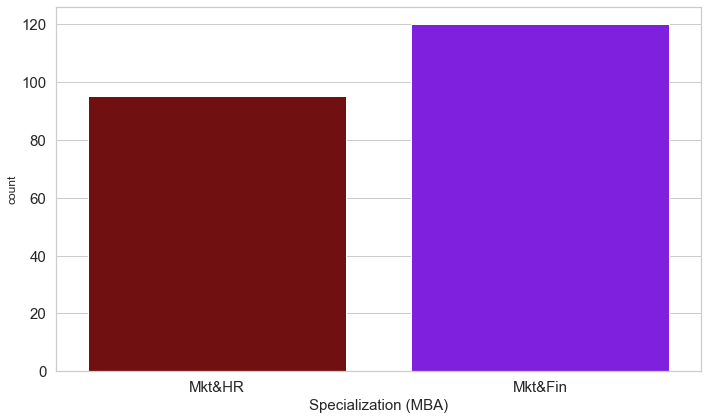

In [25]:
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(10, 6)
gs = fig.add_gridspec(3,3) 
ax = sns.countplot(x=camp_emp['specialisation'], palette=color_palette)
ax.set_xlabel('Specialization (MBA)', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
fig.tight_layout()
#fig.savefig('countplot_specialization.png')

# Plotting the count of the Status Column

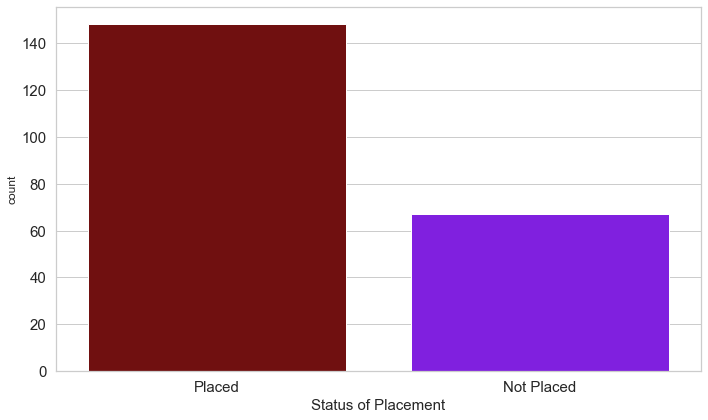

In [26]:
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(10, 6)
gs = fig.add_gridspec(3,3) 
ax = sns.countplot(x=camp_emp['status'], palette=color_palette)
ax.set_xlabel('Status of Placement', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
fig.tight_layout()
#fig.savefig('countplot_status.png')

# Correlation matrix of the continuous variables

In [27]:
cont_corr = camp_emp[cont_col].corr().transpose()
cont_corr

,ssc_p,hsc_p,degree_p,etest_p,mba_p
ssc_p,1.000000,0.459534,0.528426,0.261993,0.388478
hsc_p,0.459534,1.000000,0.407082,0.202598,0.283365
degree_p,0.528426,0.407082,1.000000,0.246085,0.392909
etest_p,0.261993,0.202598,0.246085,1.000000,0.218055
mba_p,0.388478,0.283365,0.392909,0.218055,1.000000


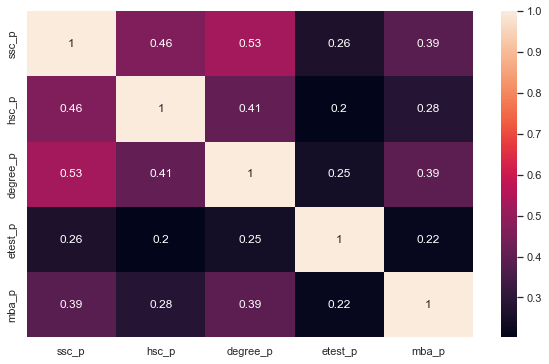

In [28]:
# Plotting the correlation 

color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig = plt.figure(figsize=(10,6))
ax.text(1.5, -0.1, "Correlation Matrix",fontsize=22)
sns.heatmap(cont_corr,annot=True)
fig.savefig('corr_plot.png')
plt.show()

# Distribution of continuous variables with the status

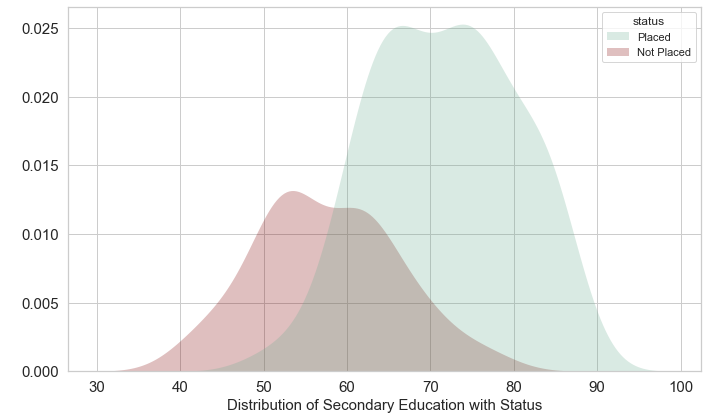

In [29]:
# Distribution of ssc_p with output

color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig = plt.figure(figsize=(10,6))
ax = sns.kdeplot(x=camp_emp['ssc_p'], hue='status', data=camp_emp, palette=["#6aac90","#800000"], fill=True,
                linewidth=0)
ax.set_xlabel('Distribution of Secondary Education with Status', fontsize=15)
ax.set_ylabel(" ")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
fig.tight_layout()
#fig.savefig('distr_ssc_p.png')

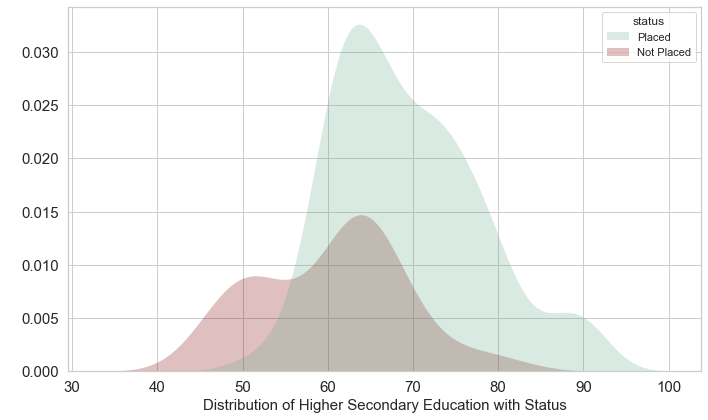

In [30]:
# Distribution of hsc_p with output

color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig = plt.figure(figsize=(10,6))
ax = sns.kdeplot(x=camp_emp['hsc_p'], hue='status', data=camp_emp, palette=["#6aac90","#800000"], fill=True,
                linewidth=0)
ax.set_xlabel('Distribution of Higher Secondary Education with Status', fontsize=15)
ax.set_ylabel(" ")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
fig.tight_layout()
#fig.savefig('distr_hsc_p.png')

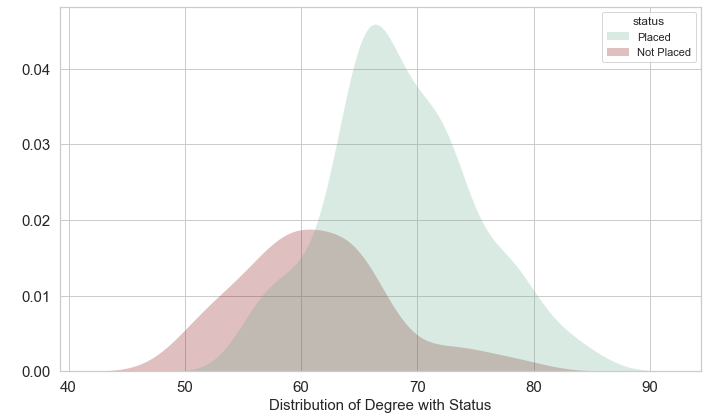

In [31]:
# Distribution of degree_p with output

color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig = plt.figure(figsize=(10,6))
ax = sns.kdeplot(x=camp_emp['degree_p'], hue='status', data=camp_emp, palette=["#6aac90","#800000"], fill=True,
                linewidth=0)
ax.set_xlabel('Distribution of Degree with Status', fontsize=15)
ax.set_ylabel(" ")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
fig.tight_layout()
#fig.savefig('distr_degree_p.png')

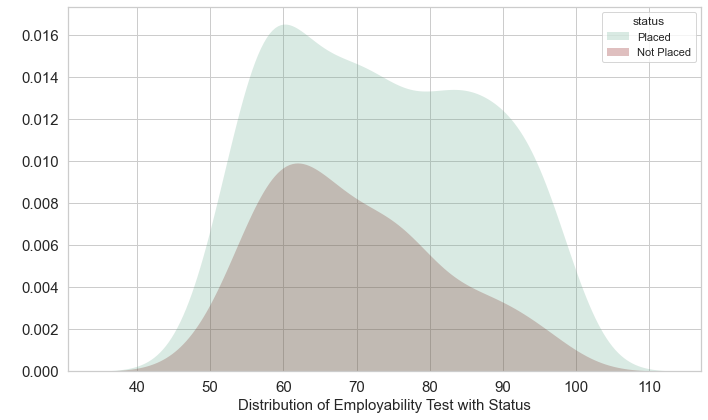

In [32]:
# Distribution of etest_p with output

color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig = plt.figure(figsize=(10,6))
ax = sns.kdeplot(x=camp_emp['etest_p'], hue='status', data=camp_emp, palette=["#6aac90","#800000"], fill=True,
                linewidth=0)
ax.set_xlabel('Distribution of Employability Test with Status', fontsize=15)
ax.set_ylabel(" ")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
fig.tight_layout()
#fig.savefig('distr_etest_p.png')

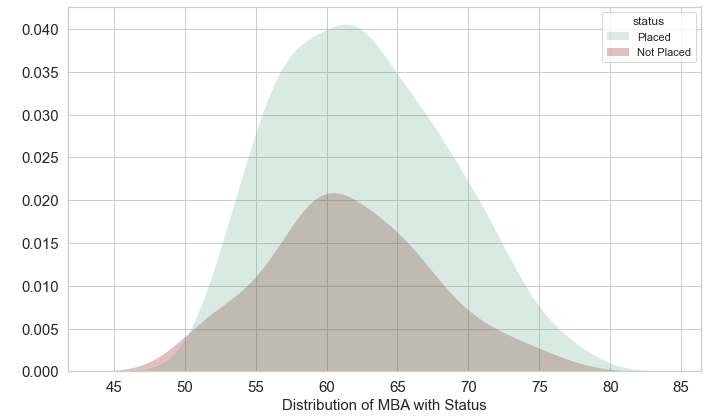

In [33]:
# Distribution of mba_p with output

color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig = plt.figure(figsize=(10,6))
ax = sns.kdeplot(x=camp_emp['mba_p'], hue='status', data=camp_emp, palette=["#6aac90","#800000"], fill=True,
                linewidth=0)
ax.set_xlabel('Distribution of MBA with Status', fontsize=15)
ax.set_ylabel(" ")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
fig.tight_layout()
#fig.savefig('distr_mba_p.png')

# Distribution of categorical variables with status

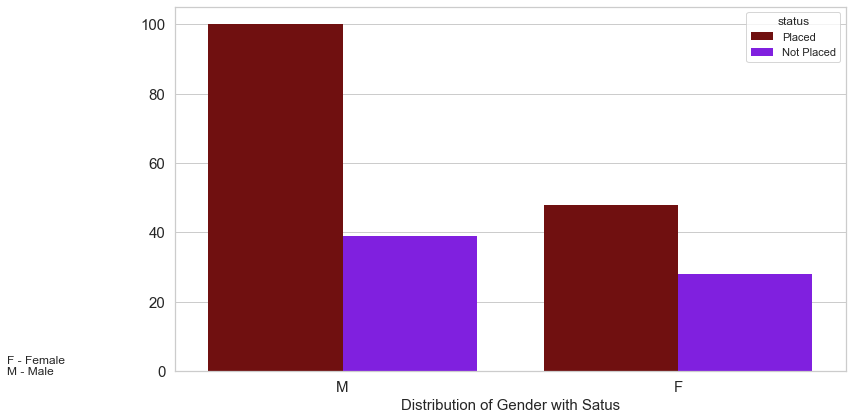

In [34]:
# Distribution of gender with output

color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig = plt.figure(figsize=(12,6))
ax = sns.countplot(x=camp_emp['gender'], hue='status', data=camp_emp, palette=color_palette, fill=True,
                linewidth=0)
ax.set_xlabel('Distribution of Gender with Satus', fontsize=15)
ax.set_ylabel(" ")
ax.text(-1, -1, "F - Female\nM - Male")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
fig.tight_layout()
#fig.savefig('distr_gender.png')

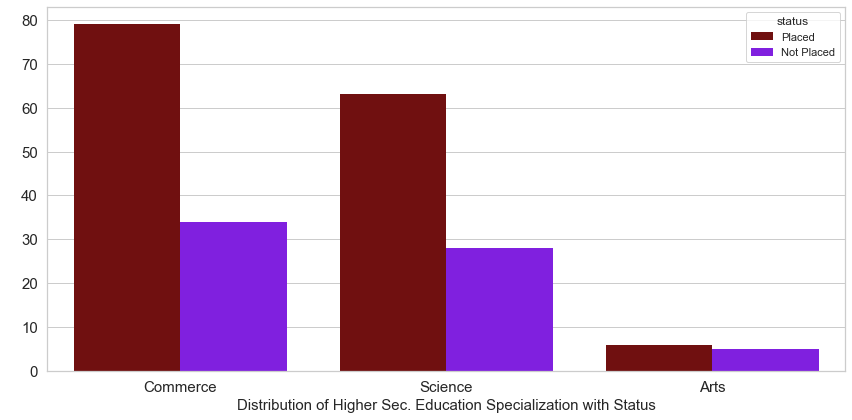

In [35]:
# Distribution of hsc_s with output

color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig = plt.figure(figsize=(12,6))
ax = sns.countplot(x=camp_emp['hsc_s'], hue='status', data=camp_emp, palette=color_palette, fill=True,
                linewidth=0)
ax.set_xlabel('Distribution of Higher Sec. Education Specialization with Status', fontsize=15)
ax.set_ylabel(" ")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
fig.tight_layout()
#fig.savefig('distr_hsc_s.png')

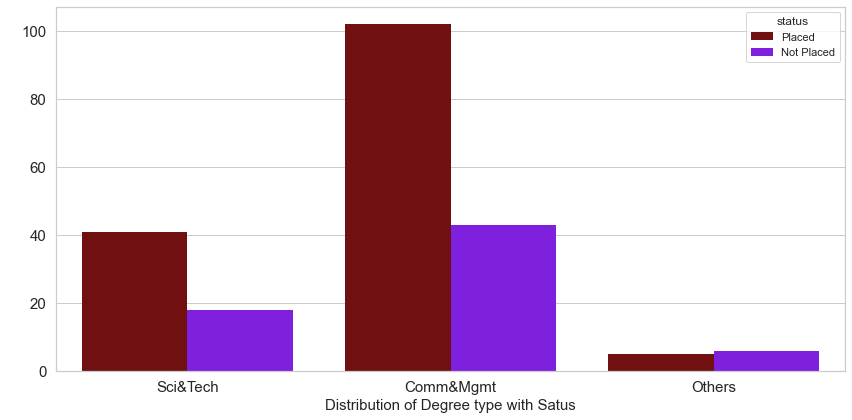

In [36]:
# Distribution of degree_t with output

color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig = plt.figure(figsize=(12,6))
ax = sns.countplot(x=camp_emp['degree_t'], hue='status', data=camp_emp, palette=color_palette, fill=True,
                linewidth=0)
ax.set_xlabel('Distribution of Degree type with Satus', fontsize=15)
ax.set_ylabel(" ")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
fig.tight_layout()
#fig.savefig('distr_degree_t.png')

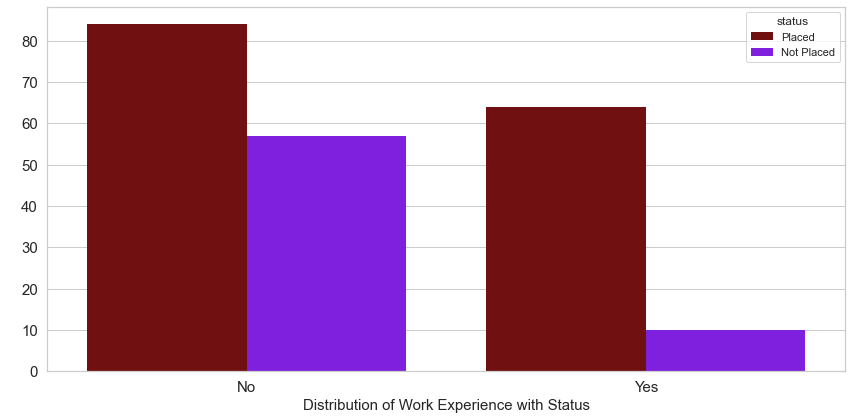

In [37]:
# Distribution of workex with output

color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig = plt.figure(figsize=(12,6))
ax = sns.countplot(x=camp_emp['workex'], hue='status', data=camp_emp, palette=color_palette, fill=True,
                linewidth=0)
ax.set_xlabel('Distribution of Work Experience with Status', fontsize=15)
ax.set_ylabel(" ")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
fig.tight_layout()
#fig.savefig('distr_workex.png')

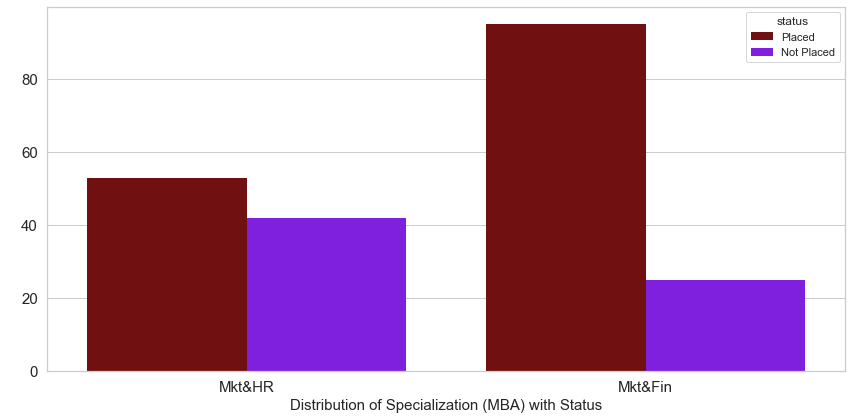

In [38]:
# Distribution of specialization with output

color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig = plt.figure(figsize=(12,6))
ax = sns.countplot(x=camp_emp['specialisation'], hue='status', data=camp_emp, palette=color_palette, fill=True,
                linewidth=0)
ax.set_xlabel('Distribution of Specialization (MBA) with Status', fontsize=15)
ax.set_ylabel(" ")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
fig.tight_layout()
#fig.savefig('distr_specialization')

# Pairplot with Status

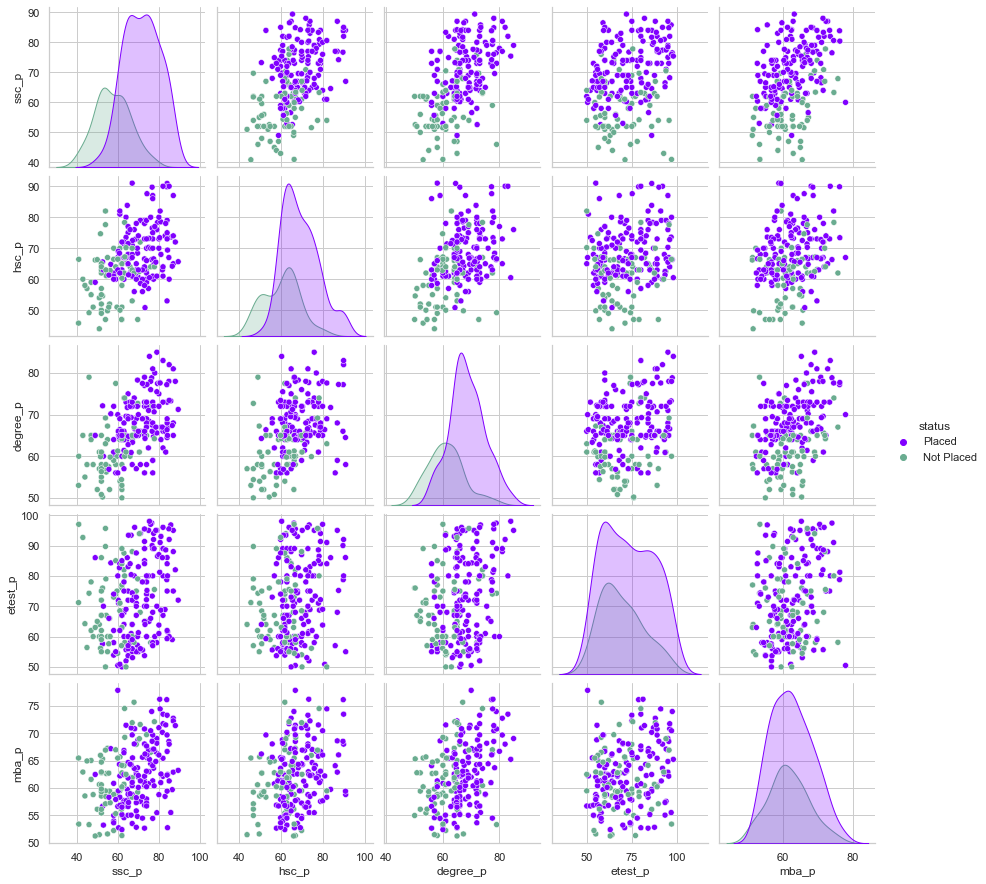

In [39]:
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
sns.pairplot(camp_emp, hue='status', palette=["#8000ff","#6aac90"])
#fig.savefig('pairplot.png')
plt.show()

# Packages for Modelling

In [40]:
# Train Test Split
from sklearn.model_selection import train_test_split

# Metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# Scaling
from sklearn.preprocessing import StandardScaler

# Models
from sklearn.linear_model import LogisticRegression

# Creating Dummy Variables

In [41]:
cat_col = ['gender', 'hsc_s', 'degree_t', 'workex', 'specialisation']
cont_col = ['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']
output_col = ['status']

# Copy the original dataset
camp_emp_model = camp_emp

# Get the dummy variables for the categorical variables
camp_emp_model = pd.get_dummies(camp_emp_model, columns=cat_col, drop_first=True)

In [42]:
camp_emp_model.head()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,status,gender_M,hsc_s_Commerce,hsc_s_Science,degree_t_Others,degree_t_Sci&Tech,workex_Yes,specialisation_Mkt&HR
0,67.00,91.00,58.00,55.0,58.80,Placed,1,1,0,0,1,0,1
1,79.33,78.33,77.48,86.5,66.28,Placed,1,0,1,0,1,1,0
2,65.00,68.00,64.00,75.0,57.80,Placed,1,0,0,0,0,0,0
3,56.00,52.00,52.00,66.0,59.43,Not Placed,1,0,1,0,1,0,1
4,85.80,73.60,73.30,96.8,55.50,Placed,1,1,0,0,0,0,0


# Data Standardization (Continuous variables)

In [43]:
# the scaler object (model)
scaler = StandardScaler()

# fit and transform the data
camp_emp_model[cont_col] = scaler.fit_transform(camp_emp_model[cont_col])

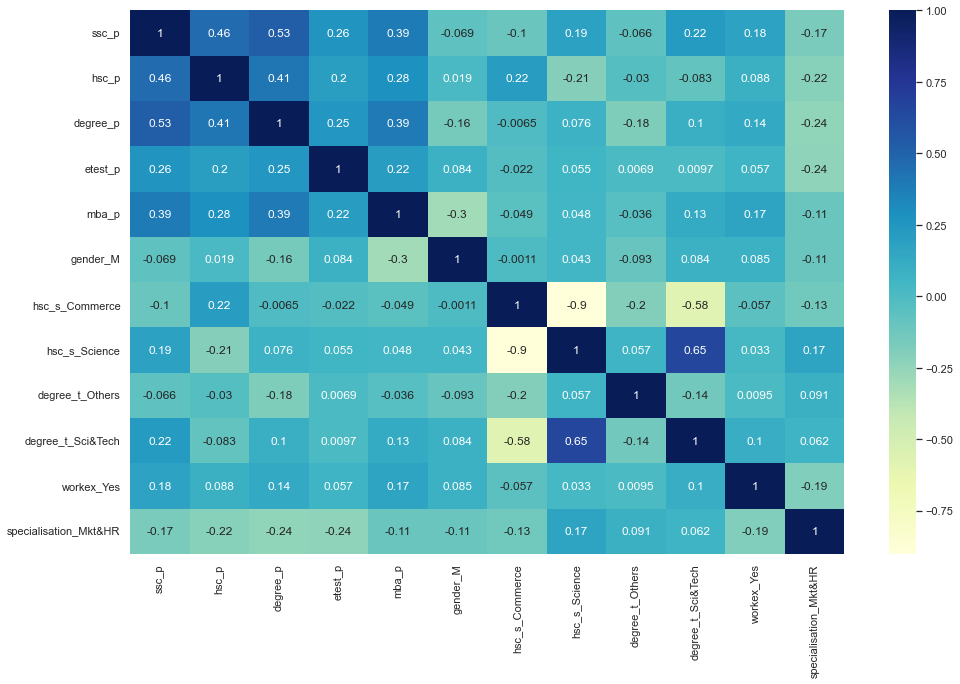

In [44]:
# Plotting the correlation coefficients

plt.figure(figsize = (16, 10))
sns.heatmap(camp_emp_model.corr(), annot = True, cmap="YlGnBu")
plt.show()

# Defining the predictor variables X and predicted variable y

In [45]:
camp_emp_model.replace({'status': {'Placed': 1,
                                  'Not Placed': 0}}, inplace=True)
camp_emp_model

,ssc_p,hsc_p,degree_p,etest_p,mba_p,status,gender_M,hsc_s_Commerce,hsc_s_Science,degree_t_Others,degree_t_Sci&Tech,workex_Yes,specialisation_Mkt&HR
0,-0.028087,2.578711,-1.155288,-1.291091,-0.597647,1,1,1,0,0,1,0,1
1,1.113369,1.242974,1.570732,1.087157,0.687620,1,1,0,1,0,1,1,0
2,-0.213238,0.153932,-0.315651,0.218908,-0.769474,1,1,0,0,0,0,0,0
3,-1.046417,-1.532870,-1.994924,-0.460592,-0.489396,0,1,0,1,0,1,0,1
4,1.712332,0.744313,0.985785,1.864806,-1.164676,1,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1.230940,1.629884,1.587525,1.426906,2.098321,1,1,1,0,0,0,0,0
211,-0.861266,-0.689469,0.803864,0.143408,-1.487711,1,1,0,1,0,1,0,0
212,-0.028087,0.048507,0.943803,-0.989091,1.278706,1,1,1,0,0,0,1,0
213,0.619941,-0.056918,-1.155288,-0.158592,-0.351934,1,0,1,0,0,0,0,1


In [46]:
X = camp_emp_model.drop(['status'], axis=1)
y = camp_emp_model['status']

In [47]:
print('Predictor:', X, sep='\n')
print('Predict:', y, sep='\n')

Predictor:
        ssc_p     hsc_p  degree_p   etest_p     mba_p  gender_M  \
0   -0.028087  2.578711 -1.155288 -1.291091 -0.597647         1   
1    1.113369  1.242974  1.570732  1.087157  0.687620         1   
2   -0.213238  0.153932 -0.315651  0.218908 -0.769474         1   
3   -1.046417 -1.532870 -1.994924 -0.460592 -0.489396         1   
4    1.712332  0.744313  0.985785  1.864806 -1.164676         1   
..        ...       ...       ...       ...       ...       ...   
210  1.230940  1.629884  1.587525  1.426906  2.098321         1   
211 -0.861266 -0.689469  0.803864  0.143408 -1.487711         1   
212 -0.028087  0.048507  0.943803 -0.989091  1.278706         1   
213  0.619941 -0.056918 -1.155288 -0.158592 -0.351934         0   
214 -0.490964 -0.900319 -1.854985  1.275907 -0.353652         1   

     hsc_s_Commerce  hsc_s_Science  degree_t_Others  degree_t_Sci&Tech  \
0                 1              0                0                  1   
1                 0              1  

# Splitting data into Train and Test data

In [48]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)


print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("shape of y_test:", y_test.shape)

Shape of X_train: (150, 12)
Shape of X_test: (65, 12)
Shape of y_train: (150,)
shape of y_test: (65,)


# Train the model

# LOGISTIC REGRESSION

In [49]:
# Instantiate the model
model = LogisticRegression(solver='liblinear', multi_class='ovr', random_state=0)

# Fit the model
model.fit(X_train, y_train)

LogisticRegression(multi_class='ovr', random_state=0, solver='liblinear')

In [50]:
# Evaluate the model

# Using the training data
train_predict = model.predict(X_train)
print('Accuracy on training data:', accuracy_score(y_train, train_predict))
print('Pricision on training data:', precision_score(y_train, train_predict))
print('Recall on training data:', recall_score(y_train, train_predict))

Accuracy on training data: 0.8866666666666667
Pricision on training data: 0.9065420560747663
Recall on training data: 0.9326923076923077


In [51]:
# Performance metrics
test_predict = model.predict(X_test)
print('Accuracy on testing data:', accuracy_score(y_test, test_predict))
print('Pricision on testing data:', precision_score(y_test, test_predict))
print('Recall on testing data:', recall_score(y_test, test_predict))

Accuracy on testing data: 0.8
Pricision on testing data: 0.8163265306122449
Recall on testing data: 0.9090909090909091


In [52]:
# Confusion matrix
print('The confusion matrix is:', confusion_matrix(y_test, test_predict), sep='\n')

The confusion matrix is:
[[12  9]
 [ 4 40]]


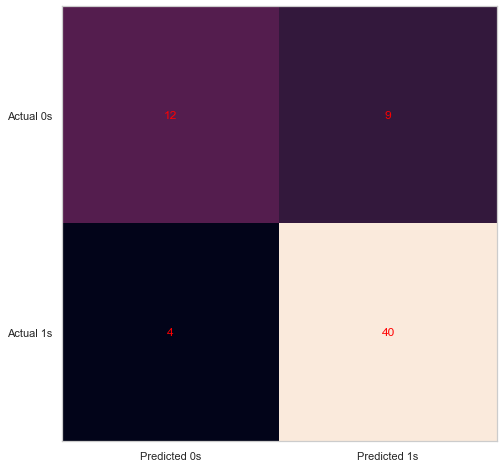

In [53]:
# Plotting the confusion matrix
cm = confusion_matrix(y_test, test_predict)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [54]:
# Performance metrics
TN, FP, FN, TP = cm.ravel()

calculated_accuracy = (TP+TN)/(TP+TN+FP+FN)
calculated_precision = (TP)/(TP+FP)
calculated_recall = (TP)/(TP+FN)
print("Calculated accuracy = ", calculated_accuracy)
print("Calculated precision = ", calculated_precision)
print("Calculated recall = ", calculated_recall)

Calculated accuracy =  0.8
Calculated precision =  0.8163265306122449
Calculated recall =  0.9090909090909091


In [55]:
# Classification
print(classification_report(y_test, test_predict))

              precision    recall  f1-score   support

           0       0.75      0.57      0.65        21
           1       0.82      0.91      0.86        44

    accuracy                           0.80        65
   macro avg       0.78      0.74      0.75        65
weighted avg       0.79      0.80      0.79        65



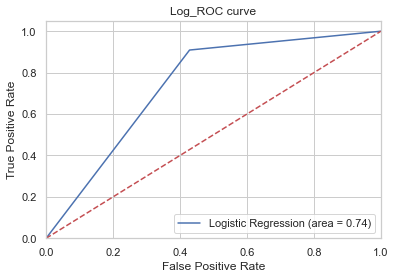

In [56]:
# Plotting roc, auc curve 
model_roc_auc = roc_auc_score(y_test, test_predict)
fpr, tpr, thresholds = roc_curve(y_test, test_predict)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Log_ROC curve')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# GENDER UNAWARE - LOGISTIC REGRESSION

In [57]:
# Group unaware - drop the gender parameter from the train and test data

X_train_gb = X_train.drop(columns=['gender_M'])
X_test_gb = X_test.drop(columns=['gender_M'])

In [58]:
# Train a new LogisticRegression model

model_gb = LogisticRegression(solver='liblinear', multi_class='ovr', random_state=0)
model_gb.fit(X_train_gb, y_train)

LogisticRegression(multi_class='ovr', random_state=0, solver='liblinear')

In [59]:
#Evaluation based on training data

train_predict_gb = model_gb.predict(X_train_gb)
print("Accuracy on train data: ", accuracy_score(y_train, train_predict_gb))
print("Precision using train data:", precision_score(y_train, train_predict_gb))
print("Recall using train data:", recall_score(y_train, train_predict_gb))

Accuracy on train data:  0.8933333333333333
Precision using train data: 0.9074074074074074
Recall using train data: 0.9423076923076923


In [60]:
#Performance metrics
test_predict_gb = model_gb.predict(X_test_gb)
print("Accuracy on test data: ", accuracy_score(y_test, test_predict_gb))
print("Precision using test data:", precision_score(y_test, test_predict_gb))
print("Recall using test data:", recall_score(y_test, test_predict_gb))

Accuracy on test data:  0.7846153846153846
Precision using test data: 0.8125
Recall using test data: 0.8863636363636364


In [61]:
# Confusion matrix
print('The confusion matrix is:', confusion_matrix(y_test, test_predict_gb), sep='\n')

The confusion matrix is:
[[12  9]
 [ 5 39]]


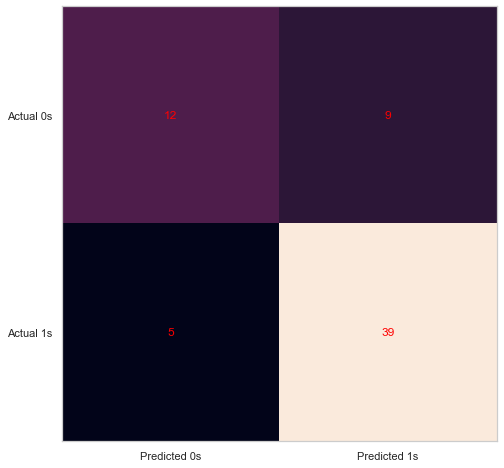

In [62]:
# Plotting the confusion matrix
cm = confusion_matrix(y_test, test_predict_gb)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [63]:
# Performance metrics
TN, FP, FN, TP = cm.ravel()

calculated_accuracy = (TP+TN)/(TP+TN+FP+FN)
calculated_precision = (TP)/(TP+FP)
calculated_recall = (TP)/(TP+FN)
print("Calculated accuracy = ", calculated_accuracy)
print("Calculated precision = ", calculated_precision)
print("Calculated recall = ", calculated_recall)

Calculated accuracy =  0.7846153846153846
Calculated precision =  0.8125
Calculated recall =  0.8863636363636364


In [64]:
# Classification
print(classification_report(y_test, test_predict_gb))

              precision    recall  f1-score   support

           0       0.71      0.57      0.63        21
           1       0.81      0.89      0.85        44

    accuracy                           0.78        65
   macro avg       0.76      0.73      0.74        65
weighted avg       0.78      0.78      0.78        65



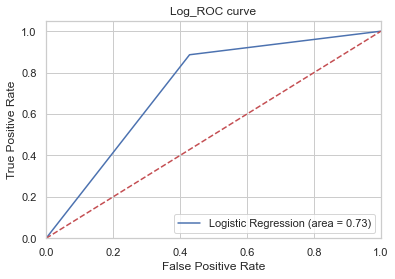

In [65]:
# Plotting roc, auc curve 
model_roc_auc = roc_auc_score(y_test, test_predict_gb)
fpr, tpr, thresholds = roc_curve(y_test, test_predict_gb)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Log_ROC curve')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Splitting the True and Predicted Values into Male and Female Groups

In [66]:
# Get the indices for 'Male' and 'Female' from the test data
# Check the 'Gender' parameter (Protected characteristics) and extract the indices where
# the values are 1.0 (Male) and 0.0 (Female)

PROTECTED = 'gender_M'
MEN = 1.0
WOMEN = 0.0
men_indices = np.where(X_test[PROTECTED] == MEN)[0]
women_indices = np.where(X_test[PROTECTED] == WOMEN)[0]
print(men_indices)
print("No of Men=", men_indices.size)
print(women_indices) 
print("No of Women=", women_indices.size)

[ 0  1  5  7  9 10 13 14 15 16 18 19 21 24 25 27 29 30 31 32 33 34 35 38
 41 42 43 44 45 46 47 48 49 52 54 55 56 57 59 61 63]
No of Men= 41
[ 2  3  4  6  8 11 12 17 20 22 23 26 28 36 37 39 40 50 51 53 58 60 62 64]
No of Women= 24


# Extract the actual outcomes for the two groups

In [67]:
# Use the indices to slit y_test into two groups (Male and Female)
y_test_m = [y_test.values[i] for i in men_indices]
y_test_f = [y_test.values[i] for i in women_indices]
print("Male Actual Outcome:", y_test_m)
print("Female Actual Outcome:", y_test_f)

Male Actual Outcome: [1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1]
Female Actual Outcome: [1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0]


# Extract the predicted outomes for the two groups

In [68]:
test_predict_m = [test_predict_gb[i] for i in men_indices]
print("Male Predicted Outcome:", test_predict_m)
test_predict_f = [test_predict_gb[i] for i in women_indices]
print("Female Predicted Outcome:", test_predict_f)

Male Predicted Outcome: [1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0]
Female Predicted Outcome: [1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0]


# Confusion matrix for the two groups

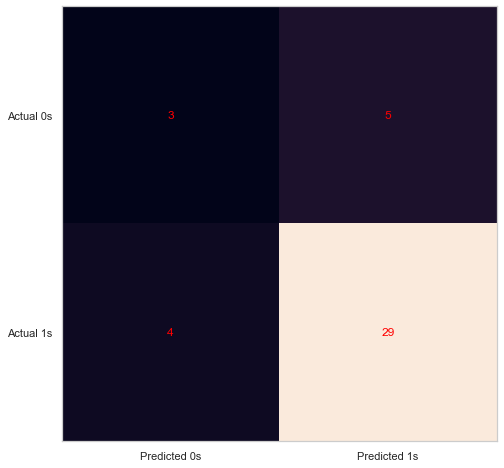

In [69]:
# Male

cm = confusion_matrix(y_test_m, test_predict_m)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

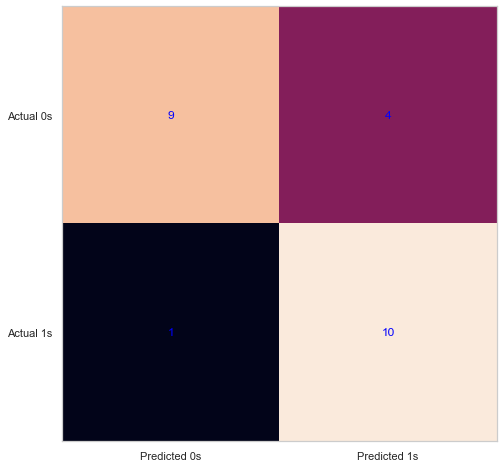

In [70]:
# Female

cm = confusion_matrix(y_test_f , test_predict_f)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='blue')
plt.show()

# Performance matrix for both confusion matrix

In [71]:
# Male
print(classification_report(y_test_m, test_predict_m))

              precision    recall  f1-score   support

           0       0.43      0.38      0.40         8
           1       0.85      0.88      0.87        33

    accuracy                           0.78        41
   macro avg       0.64      0.63      0.63        41
weighted avg       0.77      0.78      0.77        41



In [72]:
# Female
print(classification_report(y_test_f, test_predict_f))

              precision    recall  f1-score   support

           0       0.90      0.69      0.78        13
           1       0.71      0.91      0.80        11

    accuracy                           0.79        24
   macro avg       0.81      0.80      0.79        24
weighted avg       0.81      0.79      0.79        24



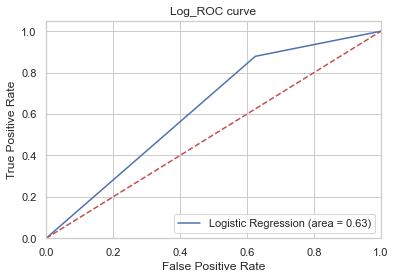

In [73]:
# Plotting roc, auc curve - Male

model_roc_auc = roc_auc_score(y_test_m, test_predict_m)
fpr, tpr, thresholds = roc_curve(y_test_m, test_predict_m)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Log_ROC curve')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

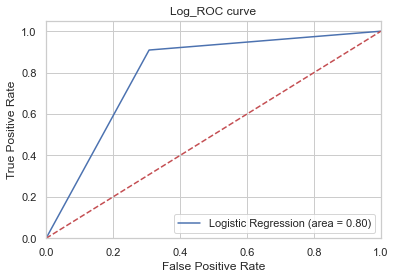

In [74]:
# Plotting roc, auc curve - Female

model_roc_auc = roc_auc_score(y_test_f, test_predict_f)
fpr, tpr, thresholds = roc_curve(y_test_f, test_predict_f)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Log_ROC curve')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# MODEL PERSISTENCE - LIME

Model Persistence: this will allow you to save a scikit-learn model for future use without the need to refrain the model.  Using Joblib package:

In [76]:
pip install LIME

You should consider upgrading via the 'C:\ProgramData\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [77]:
# Import the lime package
import lime.lime_tabular

In [84]:
# Instantiate the model
model = LogisticRegression(solver='liblinear', multi_class='ovr', random_state=0)

# Fit the model
model.fit(X_train, y_train)

LogisticRegression(multi_class='ovr', random_state=0, solver='liblinear')

In [85]:
# Create an explainer using the LimeTabularExplainer
explainer = lime.lime_tabular.LimeTabularExplainer(np.array(X_train),
                                                  feature_names = X_train.columns,
                                                  verbose = True,
                                                  mode = 'classification')

In [86]:
# Create an explanation for a predction
# where iloc selects a specific row from the test dataset.
explanation = explainer.explain_instance(X_test.iloc[0], model.predict_proba) 

Intercept 0.6324585557383575
Prediction_local [0.85226485]
Right: 0.9651533104199946


In [87]:
# Show the result of the explanation in your notebook
explanation.show_in_notebook(show_table=True)

In [88]:
explanation.as_list()

[('-0.03 < ssc_p <= 0.87', 0.18594169563565657),
 ('mba_p <= -0.79', 0.17028031507796912),
 ('hsc_p <= -0.58', -0.1365732985070708),
 ('workex_Yes <= 0.00', -0.13330229665946372),
 ('0.00 < gender_M <= 1.00', 0.04653185708803598),
 ('specialisation_Mkt&HR <= 0.00', 0.04007043789041828),
 ('-0.88 < degree_p <= -0.18', -0.028240496306367296),
 ('degree_t_Sci&Tech <= 0.00', 0.02676444029110406),
 ('0.00 < hsc_s_Commerce <= 1.00', 0.02631647592764937),
 ('degree_t_Others <= 0.00', 0.02201716628476187)]